# 注意力
注意力是稀缺的，但是环境中干扰注意力的信息并不少。

在生物学中，注意力提示可以分为非自主性提示和自主性提示

## 查询、键和值
自主性的与非自主性的注意力提示揭示了人类注意力的方式，我们要使用这两种注意力提示，用神经网络来设计注意力机制的框架。

首先，只使用非自主性的提示，我们的目标偏向于选择感官输入，可以简单地使用参数化的全连接层，甚至是非参数化的最大汇聚层或者平均汇聚层。

因此，“是否包含自主性提示”将注意力机制与全连接层或者汇聚层区别开来，在注意力机制的背景下，我们将自主性提示称为`查询`，给定任何查询，注意力机制通过`注意力汇聚`将选择引导至`感官输入`，在注意力机制中，感官输入被称为`值`，每个值都与一个`键`配对，这可以想象为感官输入的非自主提示，我们可以设计注意力汇聚，以便给定的查询可以与键进行匹配，这样将引导得出最匹配的值。


In [3]:
import sys
sys.path.append("../")
from pltutils import *
#注意力的可视化
def show_heatmaps(matrices:torch.Tensor,xlabel,ylabel,titles=None,figsize=(2.5,2.5),cmap="Reds"):
    """
    显示矩阵热图
    """
    use_svg_display()
    num_rows,num_cols=matrices.shape[0],matrices.shape[1]
    fig,axes=plt.subplots(num_rows,num_cols,figsize=figsize,sharex=True,sharey=True,squeeze=False)

    for i,(row_axes,row_matrices) in enumerate(zip(axes,matrices)):
        for j, (ax,matrix) in enumerate(zip(row_axes,row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(),cmap=cmap)
            if i==num_rows-1:
                ax.set_xlabel(xlabel)
            if j==0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_titile(titles[j])
    fig.colorbar(pcm,ax=axes,shrink=0.6)

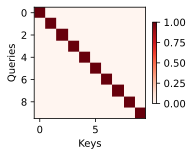

In [4]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')
